In [101]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)

from pathlib import Path
import os,sys
import h5py
import sys 

import time

import nept
sys.path.append('../PreProcessing/')  
sys.path.append('../TrackingAnalyses/')  
sys.path.append('../Lib/')
import pre_process_neuralynx as PPN
from filters_ag import *

from importlib import reload  # Python 3.4+ only.
import TreeMazeFunctions as TMF

PPN=reload(PPN)
TMF=reload(TMF)

## Get Position Matrix

In [51]:
posPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/VT1.nvt'
t,x,y,ha = PPN.load_nvt2(posPath)
step = 0.02
tp,PosMat,SegDirMat = TMF.getPositionMat(x,y,t,step)

Smoothing track data completed: 50.93 s 
Resampling the Data to 0.02 seconds completed: 0.04 s 
Converting Track x,y to TreeMaze Positions Completed: 38.84 s
Creating Position Matrix Completed : 38.89 s
Creating Segment Direction Matrix Complete: 10.44 s
Processing of Position Data Complete : 100.30 s


## Get Event Matrix

In [102]:
# path to tracking data
evPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/Events.nev'
ev = PPN.get_events(evPath)
_,EventMat = TMF.getEventMatrix(ev,tp)

In [103]:
FullMat=pd.concat([PosMat,SegDirMat,EventMat],axis=1)

In [104]:
FullMat

,Home,SegA,Center,SegB,I1,SegC,G1,SegD,G2,SegE,...,L2,L3,L4,CL,CR,TrID,cTr,iTr,LDs,RDs
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plot for a Window of time

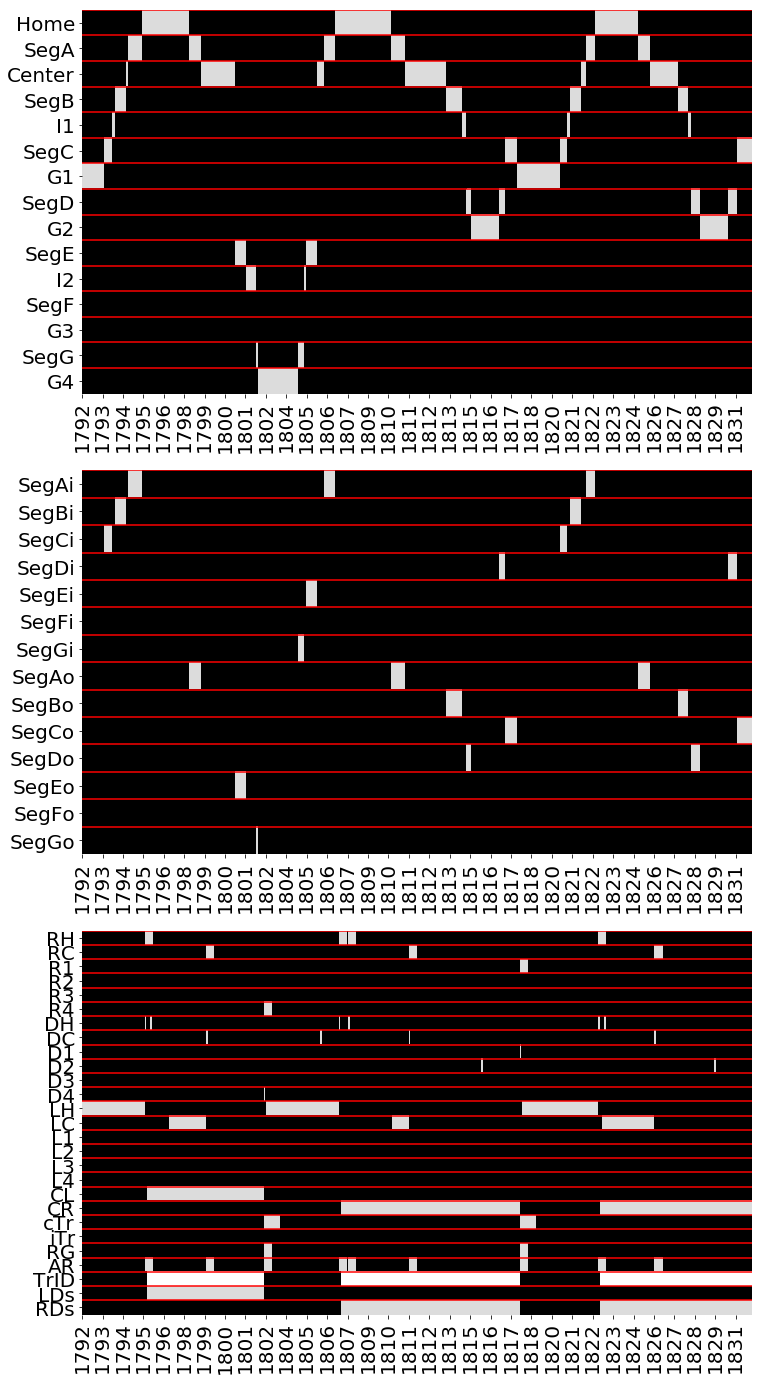

In [71]:
window = np.arange(2000)+2000*23
f,(a1,a2,a3)=plt.subplots(3,1, figsize=(12,24))

sns.heatmap(PosMat.as_matrix()[window,:].T,ax=a1,yticklabels=TMF.ZonesNames,cbar=0,cmap='Greys_r',vmax=1.3)
a1.hlines(np.arange(TMF.nZones), *a1.get_xlim(),color='red')
x=a1.get_xticks().astype(int)
_=a1.set_xticklabels(np.round(tp[window[x]]).astype(int))

sns.heatmap(SegDirMat.as_matrix()[window,:].T,ax=a2,yticklabels=SegDirMat.columns,cbar=0,cmap='Greys_r',vmax=1.3)
a2.hlines(np.arange(TMF.SegDirNames), *a2.get_xlim(),color='red')
x=a2.get_xticks().astype(int)
_=a2.set_xticklabels(np.round(tp[window[x]]).astype(int))

sns.heatmap(EventMat.as_matrix()[window,:].T,ax=a3,yticklabels=TMF.EventNames,cbar=0,cmap='Greys_r',vmax=1.3)
a3.hlines(np.arange(TMF.nEventTypes), *a3.get_xlim(),color='red')
x=a3.get_xticks().astype(int)
_=a3.set_xticklabels(np.round(tp[window[x]]).astype(int))


In [106]:
def whiten(X, method='zca'):
    """
    Whitens the input matrix X using specified whitening method.
    Inputs:
        X:      Input data matrix with data examples along the first dimension
        method: Whitening method. Must be one of 'zca', 'zca_cor', 'pca',
                'pca_cor', or 'cholesky'.
    """
    X = X.reshape((-1, np.prod(X.shape[1:])))
    X_centered = X - np.mean(X, axis=0)
    Sigma = np.dot(X_centered.T, X_centered) / X_centered.shape[0]
    W = None
    
    if method in ['zca', 'pca', 'cholesky']:
        U, Lambda, _ = np.linalg.svd(Sigma)
        if method == 'zca':
            W = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(Lambda + 1e-5)), U.T))
        elif method =='pca':
            W = np.dot(np.diag(1.0 / np.sqrt(Lambda + 1e-5)), U.T)
        elif method == 'cholesky':
            W = np.linalg.cholesky(np.dot(U, np.dot(np.diag(1.0 / (Lambda + 1e-5)), U.T))).T
    elif method in ['zca_cor', 'pca_cor']:
        V_sqrt = np.diag(np.std(X, axis=0))
        P = np.dot(np.dot(np.linalg.inv(V_sqrt), Sigma), np.linalg.inv(V_sqrt))
        G, Theta, _ = np.linalg.svd(P)
        if method == 'zca_cor':
            W = np.dot(np.dot(G, np.dot(np.diag(1.0 / np.sqrt(Theta + 1e-5)), G.T)), V_sqrt)
        elif method == 'pca_cor':
            W = np.dot(np.dot(np.diag(1.0/np.sqrt(Theta + 1e-5)), G.T), V_sqrt)
    else:
        raise Exception('Whitening method not found.')

    return np.dot(X_centered, W.T)


In [108]:
Mw = whiten(FullMat.as_matrix(),method='zca')

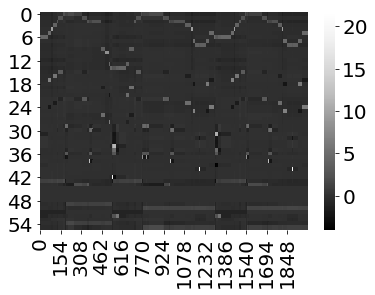

In [109]:
sns.heatmap(Mw[window,:].T,cmap='Greys_r')

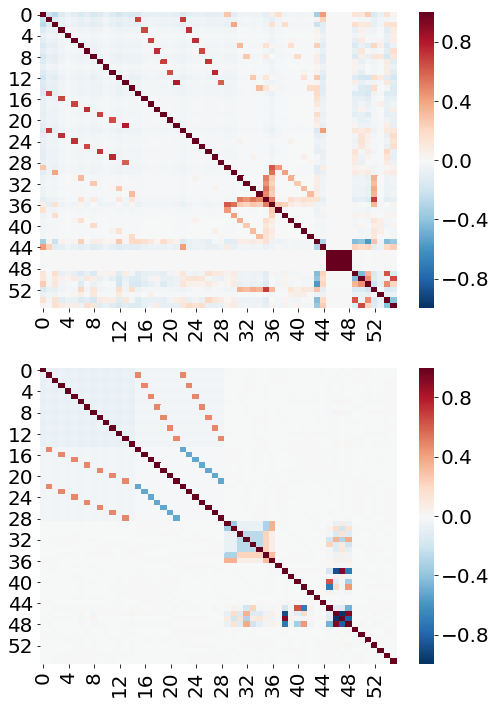

In [116]:
Mc=np.corrcoef(FullMat.T+1e-15)
Mcw=np.corrcoef(Mw.T+1e-15)

f,(a1,a2)=plt.subplots(2,1, figsize=(8,12))

sns.heatmap(Mc,ax=a1,cbar=1,cmap='RdBu_r',vmax=1,vmin=-1)
#a1.hlines(np.arange(TMF.nZones), *a1.get_xlim(),color='red')
#x=a1.get_xticks().astype(int)
#_=a1.set_xticklabels(np.round(tp[window[x]]).astype(int))

sns.heatmap(Mcw,ax=a2,cbar=1,cmap='RdBu_r',vmax=1,vmin=-1)
#a2.hlines(np.arange(TMF.nEventTypes), *a2.get_xlim(),color='red')
#x=a2.get_xticks().astype(int)
#_=a2.set_xticklabels(np.round(tp[window[x]]).astype(int))

#sns.heatmap(Mc,cmap='viridis',)

In [362]:
rate = 0.05
sb = np.random.poisson(rate,len(tp)) # spikes per bin

sb[FullMat['SegAi']==1] = np.random.poisson(rate*10,np.sum(FullMat['SegAi']==1))
sb[FullMat['CL']==1] = np.random.poisson(rate*3,np.sum(FullMat['CL']==1))
sb[FullMat['SegAo']==1] = np.random.poisson(rate*5,np.sum(FullMat['SegAo']==1))

In [163]:
import statsmodels.api as sm

In [363]:
M2 = sm.add_constant(FullMat)
glm_p = sm.GLM(sb,M2[['const','SegAi','SegAo','CL','CR']],family = sm.families.Poisson())

In [364]:
res = glm_p.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               131786
Model:                            GLM   Df Residuals:                   131781
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43071.
Date:                Tue, 12 Mar 2019   Deviance:                       59198.
Time:                        10:25:40   Pearson chi2:                 1.28e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8996      0.019   -155.025      0.000      -2.936      -2.863
SegAi          2.1127      0.024     87.393      0.0

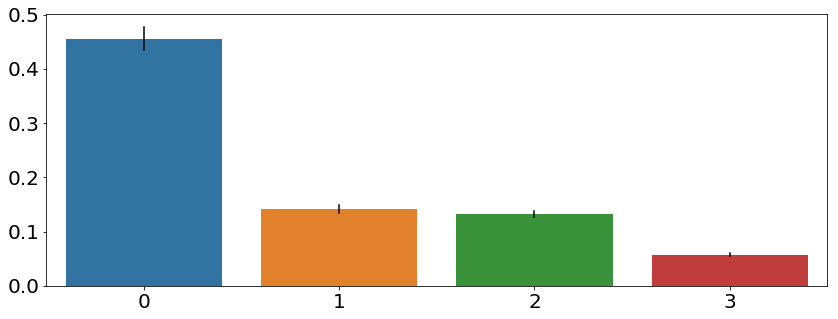

In [365]:
estimatedBaseRate = np.exp(res.params[0])
ci=np.exp(res.conf_int()[1::])*estimatedBaseRate
estimatedFRs = np.exp(res.params[1::])*estimatedBaseRate
nParams=len(res.params)-1
x=np.tile(np.arange(nParams),[2,1])
#sns.barplot(x=np.arange(57),y=np.exp(res.params)-1,ci=np.exp(res.conf_int()-1),capsize=.2)
f,a=plt.subplots(1,1, figsize=(14,5))
sns.barplot(x=np.arange(nParams),y=estimatedFRs,ax=a)
for p in np.arange(nParams):
    a.plot(x[:,p],ci.iloc[p],color='k',)

#sns.plot(np.arange(57),np.exp(res.params)-1,kind='bar')

In [366]:
estimatedFRs

SegAi    0.455269
SegAo    0.141528
CL       0.131537
CR       0.057665
dtype: float64

In [283]:
np.mean(sb)*np.exp(0.8)

0.12964562023307996